#### Bike Sharing Case study

##### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



#### Linear Regression:

- It is used for finding out relationship between forecasting and variables.It is supervised machine learning algorithm

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## lets read our data
bk = pd.read_csv('day.csv')

In [5]:
# Let's see  the head of the dataset
bk.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bk.shape

(730, 16)

**This dataset for application data has:**

- <font color=navy>**730 rows**</font>
- <font color=navy>**16 columns**</font>

In [7]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- From Above we can Say that all the columns are int and float type except dteday column.

In [8]:
bk.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### Statistical Aspect of above Data
- Count — Amount of values in that column(730)
- Mean — Avg. value in that column(365.5)
- STD(Standard Deviation) — How spread out your values are(210.877)
- Min — The lowest value in that column(1.00)
- 25% 50% 70%— Percentile
- Max — The highest value in that column(730)

In [9]:
#check all the object datatype columns in dataset
bk.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Step 2: Visualising the Data

- We can Catch the multicollinearity if there is any
- Here's where we can identify some predictor can have strong association with output variable.

###### Visualising Numeric Variables

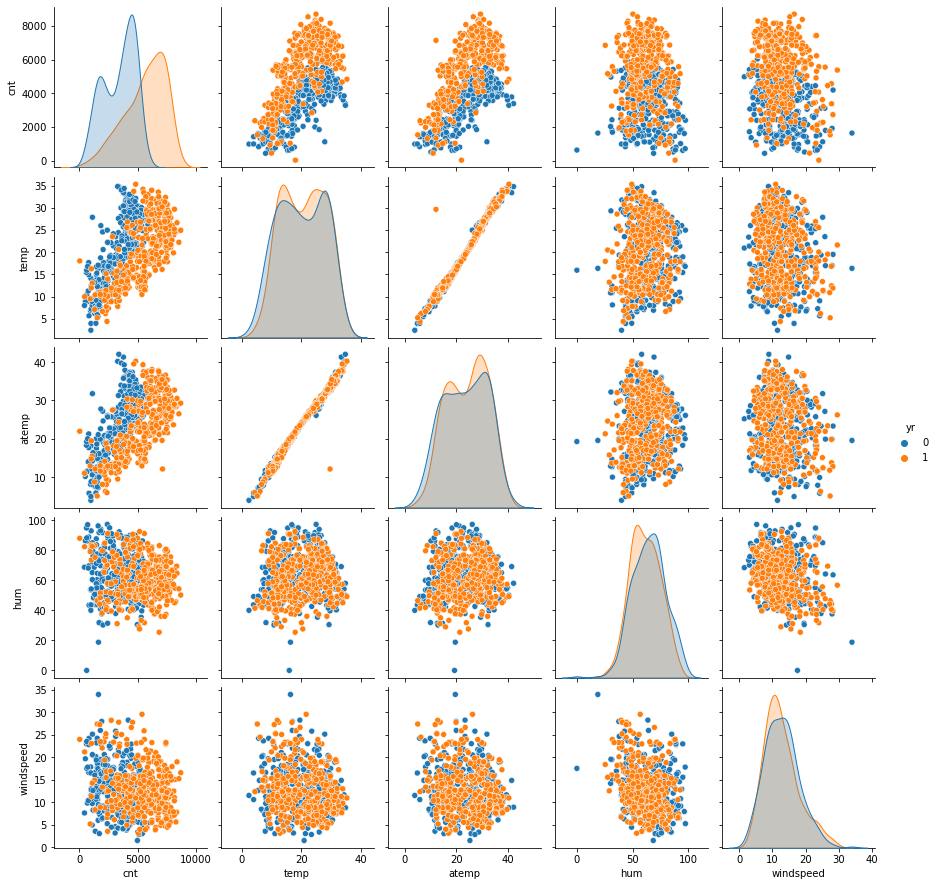

In [11]:
sns.pairplot(data=bk,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'],hue ='yr')
plt.show()

##### Visualising Categorical Variables

- Boxplot is also known by the name of Box & whisker plot.For checking out any outliers in data we use boxplots.

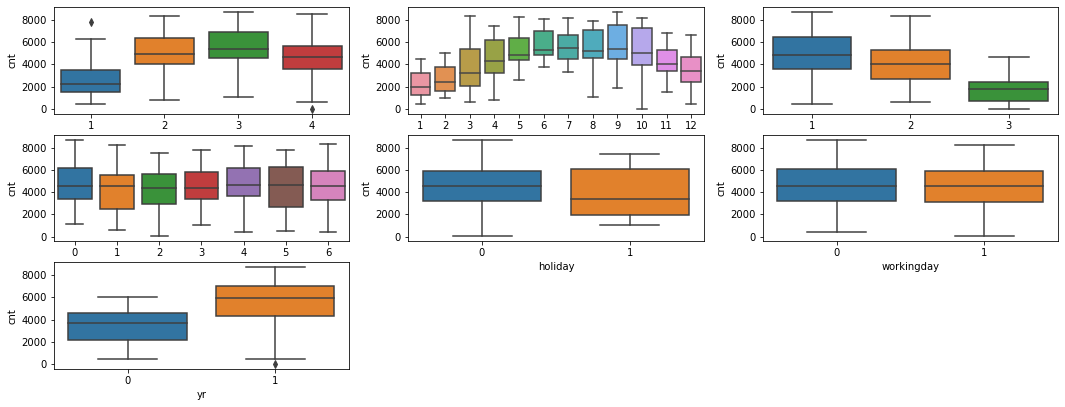

In [12]:
#boxplot
plt.figure(figsize=(18, 9))
plt.subplot(4,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bk)
plt.subplot(4,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bk)
plt.subplot(4,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bk)
plt.subplot(4,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bk)
plt.subplot(4,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bk)
plt.subplot(4,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bk)
plt.subplot(4,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bk)
plt.show()

##### Observation:
- Season 2(summer)& 3(fall) have highest count.
- March and sept month has highest count.
- saturday & sunday have the highest count.

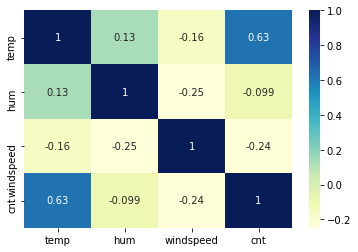

In [87]:
sns.heatmap(bk.corr(), cmap="YlGnBu", annot = True)
plt.show()

#### Observation:

- We can see that temp and cnt are highly correlated with each other.

#### Data Handling and Cleaning

##### Dropping unnecessary columns

- instant is just an index column

- count of casual bike riders have casual column.

-  registered bike riders have registered column.
- casual + registered= cnt so dropped both casual and registered column.
- atemp  which may not be needed, as we already have 'temp' feature which contains temperature of the area .

- dteday is the Date. Since, our prediction is not based on the Date, its based on hour of the day.

In [13]:
## dropping columns that are irrelevant for the model - 
bk.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
bk.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
bk.drop(["atemp"],axis=1, inplace = True)

In [15]:
bk.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [16]:
### let's Convert some numeric values to categorical data from the dataset
import calendar
bk['mnth'] = bk['mnth'].apply(lambda z: calendar.month_abbr[z])

In [17]:
## map the seasons values
bk.season = bk.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [18]:
## map the weathersit values
bk.weathersit = bk.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [19]:
bk.weekday = bk.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [20]:
bk.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Mist & Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thrusday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


##### Dummy Variables

In [21]:
### creating dummy variables
dummy_var = bk[['season','mnth','weekday','weathersit']]

In [22]:
dummy = pd.get_dummies(dummy_var,drop_first=True )

In [23]:
## adding dummy variables to original dataset
bk = pd.concat([dummy,bk],axis = 1)

In [24]:
bk.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Monday,1,Mist & Cloudy,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Thrusday,1,Clear,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


In [25]:
## let's drop the columns for which we created the dummy variables
bk.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [26]:
bk.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [27]:
bk.shape

(730, 29)

##### Step 4: Splitting the Data into Training & Testing set

#### Train-Test Split

we need to split our variable into training and testing sets. we will perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in our test dataset

- As we Know,this is the first basic step for regression is splitting the data test-train split.
- sklearn model selection has a function named train_test_split for splitting the data into training & testing data so because of this function we dont need to divide the data manually.By default sklearn will make random data splitting.

In [28]:
from sklearn.model_selection import train_test_split

# We have to  specify this so that the train and test data set should always have the same rows, respectively
np.random.seed(0)
bk_train, bk_test = train_test_split(bk, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
bk_train.shape

(510, 29)

- From above result we can say that data has been divided from 730 rows we got 510 rows as train data

In [30]:
bk_train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.135294,0.029412,0.343137,0.507843,0.025490,0.711765,20.102429,63.112926,12.831318,4486.382353
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.342373,0.169124,0.475223,0.500429,0.157763,0.453386,7.431169,14.156632,5.291832,1952.158739
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,20.209597,63.437500,12.083182,4530.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000


In [31]:
bk_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,1,19.201653,55.8333,12.208807,7534
576,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,29.246653,70.4167,11.083475,7216
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,16.980847,62.1250,10.792293,4066
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,10.489153,48.3333,23.500518,1796
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,15.443347,48.9583,8.708325,4220


- Now Let's check the test data

In [32]:
bk_test.shape

(219, 29)

In [33]:
bk_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 219 non-null    uint8  
 1   season_Summer                 219 non-null    uint8  
 2   season_Winter                 219 non-null    uint8  
 3   mnth_Aug                      219 non-null    uint8  
 4   mnth_Dec                      219 non-null    uint8  
 5   mnth_Feb                      219 non-null    uint8  
 6   mnth_Jan                      219 non-null    uint8  
 7   mnth_Jul                      219 non-null    uint8  
 8   mnth_Jun                      219 non-null    uint8  
 9   mnth_Mar                      219 non-null    uint8  
 10  mnth_May                      219 non-null    uint8  
 11  mnth_Nov                      219 non-null    uint8  
 12  mnth_Oct                      219 non-null    uint8  
 13  mnth

#### Let's Again Visualize the Test Data

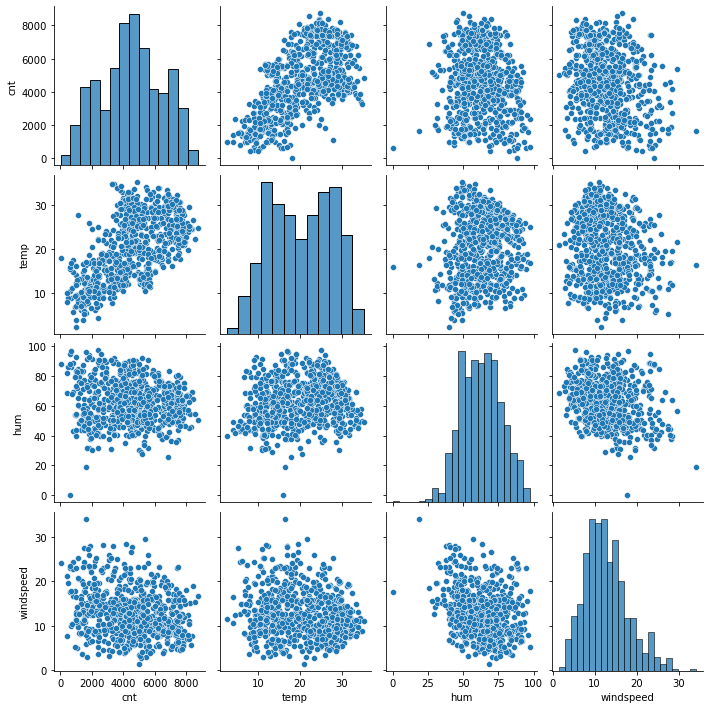

In [90]:
sns.pairplot(data=bk,vars=['cnt', 'temp', 'hum','windspeed'])
plt.show()

#### Rescaling the Features

- As we know that scaling only chnages the scale and it doesn't have any effect on our model. We rescale the variables so that they have observation under common  scale. If we don't have same scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might create disturbance at the time of model evaluation. Sofor better calculation it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.
- Standardise units: we have to Ensure all observations under one variable are expressed in a common and consistent unit
- we have to Make sure all the observations under one variable have a common scale.

- Types of rescaling:

  Min-Max scaling Standardisation (mean-0, sigma-1)

  Here, we will use MinMax scaling.

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
bk_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,1,19.201653,55.8333,12.208807,7534
576,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,29.246653,70.4167,11.083475,7216
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,16.980847,62.1250,10.792293,4066
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,10.489153,48.3333,23.500518,1796
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,15.443347,48.9583,8.708325,4220


In [38]:
num_variable=['temp','hum','windspeed','cnt']
bk_train[num_variable] = scaler.fit_transform(bk_train[num_variable])

In [39]:
pd.set_option('display.max_columns', None)
bk_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0.509887,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0.442393,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0.395666,0.504508,0.188475,0.482973


In [40]:
bk_train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
bk_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 510 non-null    uint8  
 1   season_Summer                 510 non-null    uint8  
 2   season_Winter                 510 non-null    uint8  
 3   mnth_Aug                      510 non-null    uint8  
 4   mnth_Dec                      510 non-null    uint8  
 5   mnth_Feb                      510 non-null    uint8  
 6   mnth_Jan                      510 non-null    uint8  
 7   mnth_Jul                      510 non-null    uint8  
 8   mnth_Jun                      510 non-null    uint8  
 9   mnth_Mar                      510 non-null    uint8  
 10  mnth_May                      510 non-null    uint8  
 11  mnth_Nov                      510 non-null    uint8  
 12  mnth_Oct                      510 non-null    uint8  
 13  mnth

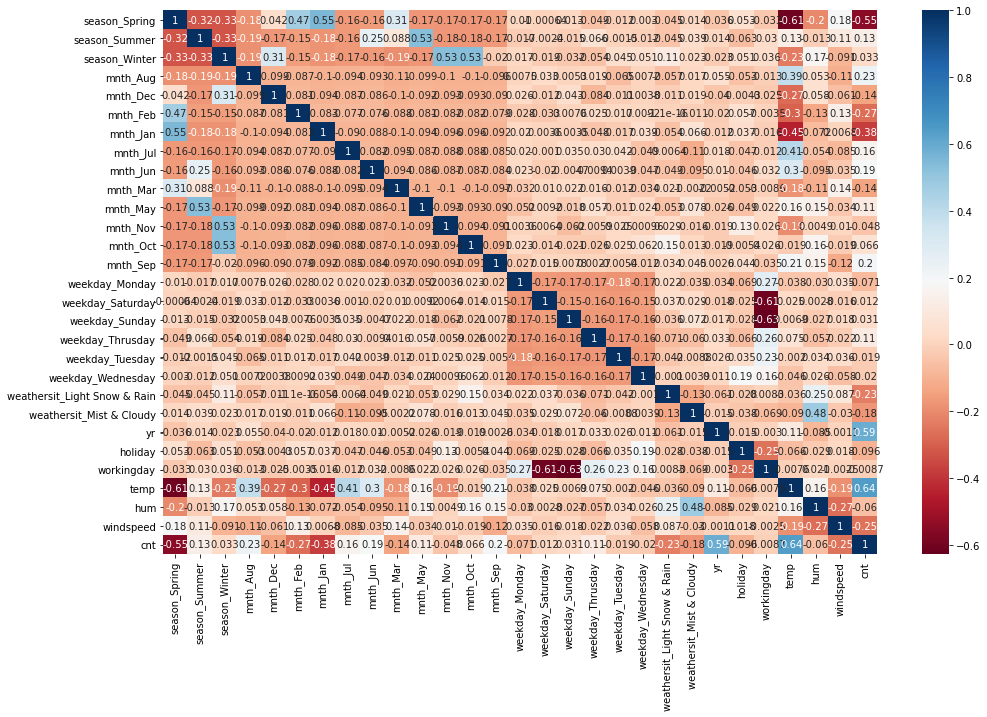

In [42]:
# Let's See the  correlation  between the  variables using heatmap

plt.figure(figsize = (16, 10))
sns.heatmap(bk_train.corr(), annot = True, cmap="RdBu")
plt.show()

- Observation

  from above heatmap we can say that 
  
  temp and cnt are highly correlated.
  
  weathersit_2 and hum is highly correlated.
  
  mnth_may highly correlated to season_summer,mnth_nov is highly correlated to season_winter.

- As you might have noticed, temp seems to the correlated to cnt the most. Let's see a pairplot for temp vs cnt.


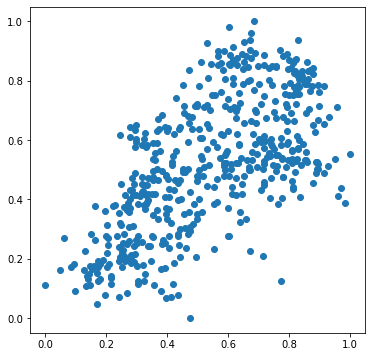

In [43]:
plt.figure(figsize=[6,6])
plt.scatter(bk_train.temp, bk_train.cnt)
plt.show()

#### Step 5:Model Building

##### Dividing into X and Y sets for the model building

In [44]:
y_train = bk_train.pop('cnt')
X_train = bk_train

##### Building a linear model

- we have to Fit a regression line through the training data using statsmodels. Remember that in statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

#### Running Recursive Function Elimination :

- It is a Feature selection Method that fits a model and removes weakest feature in the data until a specific number of feature has been attained.

In [45]:
# Importing the Necessary libraries for calculations

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
# Running the RFE method  with the output number of the variable which is equal to 10
linm = LinearRegression()
linm.fit(X_train, y_train)

rfe = RFE(linm, 15)             # running RFE method
rfe = rfe.fit(X_train, y_train)

In [47]:
#Columns selected by doing the  RFE and their weights accordingly
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 5),
 ('weekday_Thrusday', False, 12),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 10),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

##### Model 1

In [48]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Dec',
       'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [49]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday',
       'workingday'],
      dtype='object')

In [50]:
#The  X_test dataframe using creation by using selected RFE  variables
X_train_rfe = X_train[col]

In [51]:
#BUILDING MODEL with the help of STATSMODEL:

import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [52]:
linm = sm.OLS(y_train,X_train_rfe1).fit()

In [53]:
linm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          3.34e-189
Time:                        19:25:59   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3202      0.036      8.886      0.000       0.249       0.391
season_Spring                   -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_Summer                    0.0408      0.015      2.659      0.008       0.011       0.071
season_Winter                    0.1034      0.018      5.763      0.000       0.068       0.139
mnth_Dec                        -0.0372      0.017     -2.131      0.034      -0.071      -0.003
mnth_Jan                        -0.0437      0.018     -2.415      0.016      -0.079      -0.008
mnth_Jul                        -0.0555      0.018     -3.046      0.002      -0.091      -0.020
mnth_Nov                        -0.0409      0.019     -2.187      0.029      -0.078      -0.004
mnth_Sep                         0.0749      0.017      4.438      0.000       0.042       0.108
weathersit_Light Snow & Rain    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
weathersit_Mist & Cloudy        -0.0559      0.010     -5.338      0.000      -0.076      -0.035
yr                               0.2303      0.008     28.511      0.000       0.214       0.246
holiday                         -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                             0.4800      0.037     12.977      0.000       0.407       0.553
hum                             -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                       -0.1885      0.026     -7.312      0.000      -0.239      -0.138
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
## dropping mnth_Jan since it has p > 0.05

In [55]:
X_train_new = X_train_rfe.drop(["mnth_Jan"], axis = 1)

- Rebuilding the model without "mnth_Jan"

In [56]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [57]:
linm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [58]:
print(linm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          4.24e-189
Time:                        19:25:59   Log-Likelihood:                 511.73
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     495   BIC:                            -929.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Some Key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

#### For Multicollinearity check VIF

In [59]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,hum,29.35
11,temp,16.75
13,windspeed,4.72
2,season_Winter,4.06
0,season_Spring,4.04
1,season_Summer,2.80
8,weathersit_Mist & Cloudy,2.31
9,yr,2.08
5,mnth_Nov,1.82
4,mnth_Jul,1.59


- VIF Which is greater than 5 is not a good sign so we need to drop VIF>5.

In [60]:
X_train_new = X_train_new.drop(['hum'], axis=1)

In [61]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
linm = sm.OLS(y_train,X_train_lm).fit()   

In [62]:
#  summary
print(linm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          4.46e-186
Time:                        19:26:00   Log-Likelihood:                 501.77
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     496   BIC:                            -916.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [63]:
# the  new model VIFs Calculation
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
11,temp,5.12
12,windspeed,4.65
2,season_Winter,2.90
1,season_Summer,2.22
0,season_Spring,2.13
9,yr,2.07
5,mnth_Nov,1.79
4,mnth_Jul,1.59
8,weathersit_Mist & Cloudy,1.55
3,mnth_Dec,1.42


#### Train Data Residual analysis

- It is difference between  predicted step output from model and measured  from the validation dataset.
- To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms

- We need to check if normal distribution is there for error terms  (which is our important assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [64]:
y_train_pred = linm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

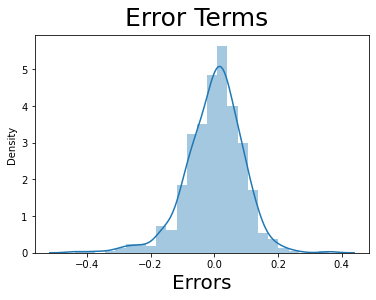

In [65]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 25)
fig.suptitle('Error Terms', fontsize = 25)                  # Plot heading 
plt.xlabel('Errors', fontsize = 20)   

##### Observation:

- From above graph we can see that there is normal distribution of residuals and out assumptions is therefore valid.
- There is linear relationship between x & y.
- The residuals have the normal distribution with a mean 0. so it is good!

In [66]:
bk=bk[[ 'temp', 'hum', 'windspeed','cnt']]

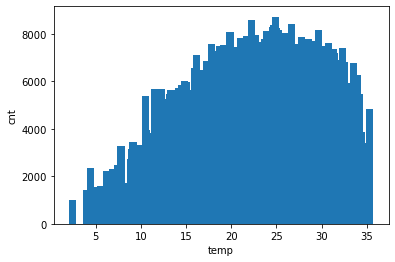

In [67]:
plt.bar(bk['temp'], bk['cnt'])
plt.xlabel("temp")
plt.ylabel("cnt")
plt.show()

- cnt is highest for temp 24

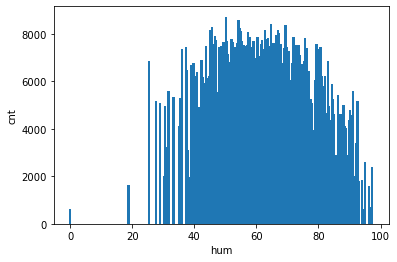

In [68]:
plt.bar(bk['hum'], bk['cnt'])
plt.xlabel("hum")
plt.ylabel("cnt")
plt.show()

- cnt is highest for humidity of 48,50 approximately.

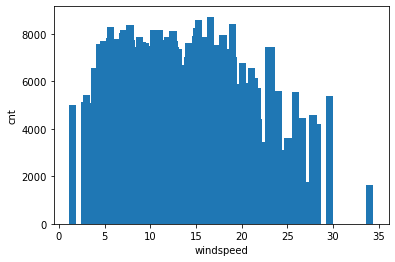

In [69]:
plt.bar(bk['windspeed'], bk['cnt'])
plt.xlabel("windspeed")
plt.ylabel("cnt")
plt.show()

- From Above graphs we can see how the variables change with cnt
- cnt is highest for windspeed of 16-17.

- Multicollinearity is not there in the predictor variables.

In [70]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,5.12
12,windspeed,4.65
2,season_Winter,2.90
1,season_Summer,2.22
0,season_Spring,2.13
9,yr,2.07
5,mnth_Nov,1.79
4,mnth_Jul,1.59
8,weathersit_Mist & Cloudy,1.55
3,mnth_Dec,1.42


- From above table we can say that all the values are in range of 5.

#### Prediction by using Final model

- We use scaler to prevent data leak from train to test dataset

In [71]:
num_vars = ['temp',  'hum', 'windspeed','cnt']

bk_test[num_vars] = scaler.transform(bk_test[num_vars])

In [72]:
bk_test.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
184,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0.511964,0.837699,0.334206,0.303382
221,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.817246,0.314298,0.537414,0.569029


In [73]:
bk_test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


- Let's Divide X_test and y_test

In [74]:
y_test = bk_test.pop('cnt')
X_test = bk_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 219 non-null    uint8  
 1   season_Summer                 219 non-null    uint8  
 2   season_Winter                 219 non-null    uint8  
 3   mnth_Aug                      219 non-null    uint8  
 4   mnth_Dec                      219 non-null    uint8  
 5   mnth_Feb                      219 non-null    uint8  
 6   mnth_Jan                      219 non-null    uint8  
 7   mnth_Jul                      219 non-null    uint8  
 8   mnth_Jun                      219 non-null    uint8  
 9   mnth_Mar                      219 non-null    uint8  
 10  mnth_May                      219 non-null    uint8  
 11  mnth_Nov                      219 non-null    uint8  
 12  mnth_Oct                      219 non-null    uint8  
 13  mnth

In [75]:
#Selecting those variables which were part of our final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test our dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Spring                 219 non-null    uint8  
 2   season_Summer                 219 non-null    uint8  
 3   season_Winter                 219 non-null    uint8  
 4   mnth_Dec                      219 non-null    uint8  
 5   mnth_Jul                      219 non-null    uint8  
 6   mnth_Nov                      219 non-null    uint8  
 7   mnth_Sep                      219 non-null    uint8  
 8   weathersit_Light Snow & Rain  219 non-null    uint8  
 9   weathersit_Mist & Cloudy      219 non-null    uint8  
 10  yr                            219 non-null    int64  
 11  holiday                       219 non-null    int64  
 12  temp                          219 non-null    float64
 13  wind

In [76]:
# Making predictions using the final model (lr6)

y_pred = linm.predict(X_test_lm6)

##### Model Evaluation

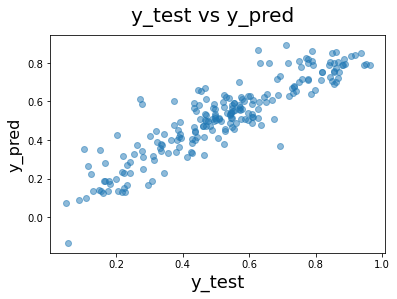

In [77]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [78]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8141059254566425

In [79]:
# value of R^2 (calculated in above step)

r2=0.8203092200749708

In [80]:
# let's see the shape of X_test
X_test.shape

(219, 13)

In [81]:
# no is number of rows in X

no = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(no-1)/(no-p-1)
adjusted_r2

0.8089141950065543

In [82]:
X_t=X_train_new.iloc[:,0].values

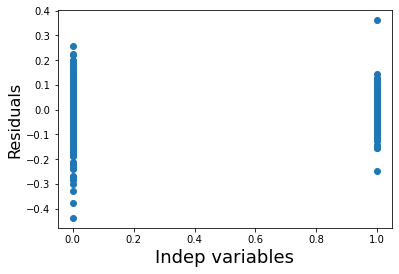

In [83]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Indep vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Indep variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

In [84]:
X_train_new.head()

,season_Spring,season_Summer,season_Winter,mnth_Dec,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,temp,windspeed
653,0,0,1,0,0,0,0,0,0,1,0,0.509887,0.300794
576,0,0,0,0,1,0,0,0,0,1,0,0.815169,0.264686
426,1,0,0,0,0,0,0,0,1,1,0,0.442393,0.255342
728,1,0,0,1,0,0,0,0,0,1,0,0.245101,0.663106
482,0,1,0,0,0,0,0,0,1,1,0,0.395666,0.188475


In [85]:
print(X_train.columns)
print(linm.summary())

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'workingday', 'temp',
       'hum', 'windspeed'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          4.46e-186
Time:                        19:26:13   Log-Likelihood:                 501.77
No. Observations:                 51

In [86]:
param = pd.DataFrame(linm.params)
param.insert(0,'Vars',param.index)
param.rename(columns = {0:'Coeff value'},inplace = True)
param['index'] = list(range(0,14))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coeff value',ascending = False,inplace = True)
param

,Vars,Coeff value
index,,
12,temp,0.468923
10,yr,0.233392
0,const,0.219788
3,season_Winter,0.093989
7,mnth_Sep,0.070430
2,season_Summer,0.039032
4,mnth_Dec,-0.032527
6,mnth_Nov,-0.035188
5,mnth_Jul,-0.052618


#### Observation

- Temp is the most affecting column for the bike sharing business followed by yr,season_Winter,mnth_Sep,season_Summer.